#Lab 3: Unsupervised Learning (Advanced Clustering)

For this lab we will use Scikit-Learn’s API, sklearn.datasets, which allows us to access a famous dataset for linguistic analysis, the 20newsgroups dataset. A newsgroup is an online user discussion group, such as a forum. Sklearn allows us to access different categories of content. We will use texts that have to do with technology, religion and sport.

More details about the dataset: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html 

Your task is to perform clustering on the given dataset. 

**Submission: submit via onq.** 


#Import Libraries

In [1]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc.
import pandas as pd
import numpy as np
#for plots
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_20newsgroups

#data preprocessing for text
import re
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#feature extraction from text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer

#Task 1: Read the dataset and report the basic statistics of the dataset import data from sklearn.datasets and selecte pre-defined categories:

from sklearn.datasets import fetch_20newsgroups

categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))


##Data Reading

In [2]:
# TODO code for task 1
categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism', ] 
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

> I will create a new data frame with two column `categories` column and `target` column to help me to make some exploration and basic statistics

In [3]:
#create dataframe
df = pd.DataFrame()
df['category'] = dataset.data
df['Target'] = dataset.target

##Data Exploration

In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2852 non-null   object
 1   Target    2852 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.7+ KB


In [5]:
#data describe
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,2852,2770,,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,2852.0,NaN,NaN,NaN,2.08871,1.386227,0.0,1.0,2.0,3.0,4.0


In [6]:
#Checking for nulls
df.isnull().sum()

category    0
Target      0
dtype: int64

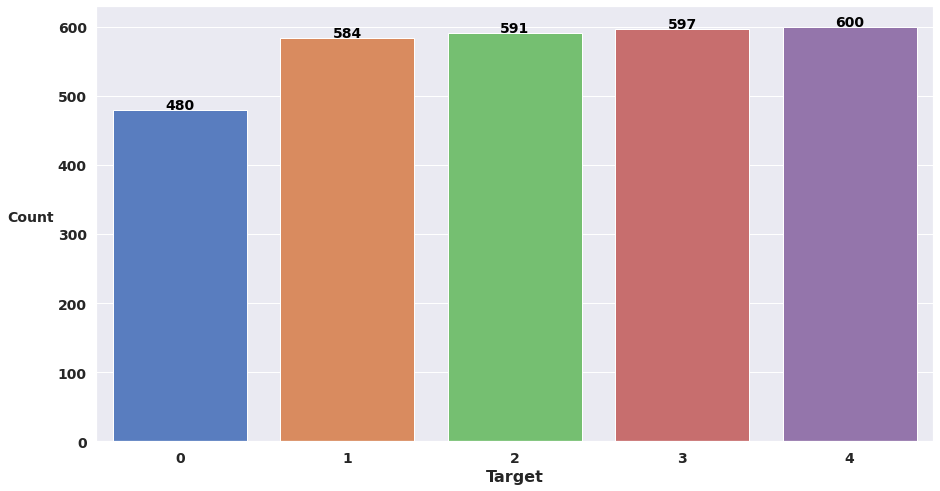

In [7]:
#target column distribution
plt.figure(figsize=(15,8))
sns.set(palette="muted", color_codes=True)
first_15 = sns.barplot(x=df['Target'].value_counts().index, y=df['Target'].value_counts().values)
plt.xticks( fontsize=14, fontweight='bold')
plt.xlabel('Target', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

for patch in first_15.patches:
  first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()), ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


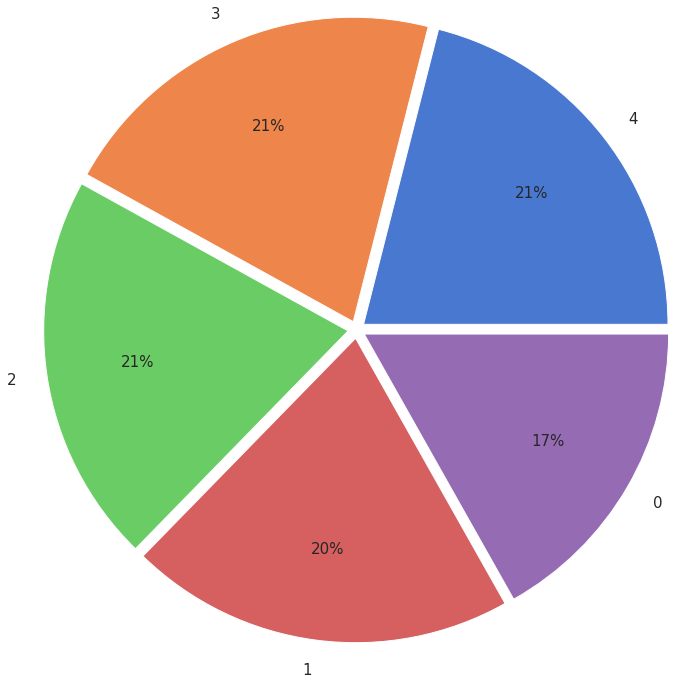

In [8]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Target'].value_counts().plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

#Task 2: Data cleaning. Use standard text preprocessing steps to preprocess raw textual content. A sample preprocessing function is provided as below.

In [9]:
# Downloading some packages
nltk.download("stopwords")
stopwords_ = stopwords.words('english')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#Text cleaning
stemmer = WordNetLemmatizer()
stemmer = SnowballStemmer(language='english')
def preprocess_text(text):
    text = text.lower()
    # remove links
    text = re.sub(r"http\S+", " ", text)
    #remove any html tags (< /br> often found)
    text = re.sub(r"<[^>]+>", " ", text)
    #convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(r"\s+", " ", text)
    #   # remove special chars and numbers
    text = re.sub(r"\b[A-Za-z]\b", " ", text)
    text = re.sub(r"[^\w]", " ", text)
    text = text.split()
    text = [stemmer.stem(word) for word in text if not word in set(stopwords_)]
    text = ' '.join(text)
    return text

In [11]:
%%time
#apply the preprocess_text Function on text column and create a new column called clean_text column
df['clean_text'] = df['category'].apply(preprocess_text)

CPU times: user 11.5 s, sys: 57.7 ms, total: 11.5 s
Wall time: 14.9 s


In [12]:
df['clean_text'][0]

'move borland 3 0 visual today tri compil program complain function prototyp problem turn typedef word ms byte unsign int could anyon shine light subject word byte ming lin'

In [13]:
df.head()

,category,Target,clean_text
0,I just moved from Borland C++ 3.0 to Visual C+...,2,move borland 3 0 visual today tri compil progr...
1,\n: \tNice cop out bill.\n\nI'm sure you're ri...,0,nice cop bill sure right idea refer would mind...
2,I'm attempting to transfer files from my home ...,2,attempt transfer file home comput run window 3...
3,\nThen not murdering would have no moral signi...,0,murder would moral signific sinc would noth vo...
4,\nI could give much the same testimonial about...,0,could give much testimoni experi scout back 19...


#Task 3: create vector representation of each document using TF-IDF encoding, if we don't know what is TF-IDF encoding, 
read this: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html 

In [14]:
# TODO code for task 3, hint, you can use TfidfVectorizer from sklearn
tfidf=TfidfVectorizer(use_idf=True, stop_words='english', max_df=0.8, min_df=5)
result = tfidf.fit_transform(df["clean_text"])

In [15]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=result[0] 
# place tf-idf values in a pandas data frame 
df_ = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"]) 
df_.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
byte,0.441271
word,0.326549
prototyp,0.282834
int,0.266827
shine,0.262668
...,...
distinguish,0.000000
distinct,0.000000
distant,0.000000
distanc,0.000000


#Task 4: Apply Kmeans and Kmeans++ on the above extracted document vectors. Brifely describe how would you select the value of k. 
You can use https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means 

> We can select the value of `K` by using two ways

> First Way
- As we know, We have 5 categories = `[
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism']`, 
 So we can choose `K` with
  - `5` for each category from above categories
  - `3` for each topic `[comp, sport, alt]`

> Second Way
- by using `Elbow` Method

> In this models I will use `K = 5`

In [16]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization. 
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

##KMeans

In [17]:
#create Kmeans object with 5 clusters 
KM = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 300, tol = 1e-0)
KM.fit(result)

KMeans(init='random', n_clusters=5, tol=1.0)

In [18]:
print('The lowest SSE value')
print(KM.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM.labels_[:5], '\n=====================================================')

The lowest SSE value
2648.054303587778 
Final locations of the centroid
[[0.00000000e+00 6.93571596e-04 5.40445215e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.15916570e-03 1.14535352e-04 8.29712758e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.28488915e-03 1.45298054e-03 8.30076900e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.98617461e-03 4.33563102e-03 5.02773860e-04 ... 0.00000000e+00
  0.00000000e+00 1.54531303e-03]
 [3.89094382e-03 3.20285248e-03 2.13265219e-03 ... 1.63020465e-04
  7.64450569e-05 7.72746484e-05]] 
The number of iterations required to converge
9 
first five predicted labels
[4 4 1 0 4] 


In [19]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM.labels_), '\n=====================================================')

Homogeneity: 0.395 
Completeness: 0.423 
V-measure: 0.408 
Adjusted Rand-Index: 0.247 
Silhouette Coefficient: 0.006 
mutual_info_score: 0.634 


##KMeans++

In [20]:
#create Kmeans++ object with 5 clusters 
KM_plus = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-0)
KM_plus.fit(result)

KMeans(n_clusters=5, tol=1.0)

In [21]:
print('The lowest SSE value')
print(KM_plus.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM_plus.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM_plus.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM_plus.labels_[:5], '\n=====================================================')

The lowest SSE value
2646.8370557270246 
Final locations of the centroid
[[3.37358460e-03 2.99245112e-03 2.11137786e-03 ... 1.39768131e-04
  6.55413582e-05 0.00000000e+00]
 [3.53091938e-03 1.20008656e-03 7.92788368e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.52173832e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.51227511e-04 1.15382603e-04 8.43856355e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.35427584e-03 4.06045939e-03 4.70864064e-04 ... 0.00000000e+00
  0.00000000e+00 1.57881810e-03]] 
The number of iterations required to converge
11 
first five predicted labels
[0 0 3 2 0] 


In [22]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM_plus.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM_plus.labels_), '\n=====================================================')

Homogeneity: 0.368 
Completeness: 0.420 
V-measure: 0.393 
Adjusted Rand-Index: 0.198 
Silhouette Coefficient: 0.009 
mutual_info_score: 0.592 


#Task 5: perform tricks on the above two approaches by considering the high-dimensional nature of the dataset, you can consider PCA (from sklearn.decomposition import PCA), or other methods. 

> I will be using TruncatedSVD because PCA does not support sparse input. So TruncatedSVD is a possible alternative.

## Dimensionality Reduction

In [23]:
svd = TruncatedSVD(n_components = 2)
X = svd.fit_transform(result)

##KMeans With TruncatedSVD

In [24]:
#create Kmeans object with 5 clusters 
KM_SVD = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 300, tol = 1e-0)
KM_SVD.fit(X)

KMeans(init='random', n_clusters=5, tol=1.0)

In [25]:
print('The lowest SSE value')
print(KM_SVD.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM_SVD.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM_SVD.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM_SVD.labels_[:5], '\n=====================================================')

The lowest SSE value
7.338732726826995 
Final locations of the centroid
[[ 0.18441166  0.15826148]
 [ 0.21060284 -0.17379956]
 [ 0.13360264 -0.04653163]
 [ 0.0359503   0.00947854]
 [ 0.1066288   0.06552552]] 
The number of iterations required to converge
1 
first five predicted labels
[2 3 1 4 3] 


In [26]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM_SVD.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM_SVD.labels_), '\n=====================================================')

Homogeneity: 0.286 
Completeness: 0.291 
V-measure: 0.288 
Adjusted Rand-Index: 0.186 
Silhouette Coefficient: -0.010 
mutual_info_score: 0.459 


##KMeans++ With TruncatedSVD

In [27]:
#create Kmeans++ object with 5 clusters 
KM_plus_SVD = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-0)
KM_plus_SVD.fit(X)

KMeans(n_clusters=5, tol=1.0)

In [28]:
print('The lowest SSE value')
print(KM_plus_SVD.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM_plus_SVD.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM_plus_SVD.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM_plus_SVD.labels_[:5], '\n=====================================================')

The lowest SSE value
6.94543057045887 
Final locations of the centroid
[[ 0.21696723 -0.18010944]
 [ 0.05631112  0.0156565 ]
 [ 0.20193507  0.17034074]
 [ 0.12965544  0.07690686]
 [ 0.14016978 -0.07315939]] 
The number of iterations required to converge
1 
first five predicted labels
[4 1 0 3 1] 


In [29]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM_plus_SVD.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')

Homogeneity: 0.281 
Completeness: 0.295 
V-measure: 0.288 
Adjusted Rand-Index: 0.165 
Silhouette Coefficient: 0.000 
mutual_info_score: 0.451 


#Task 6: compare the performance of the above four approaches on the given dataset using mutual information based scores: 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html 

> I will create a dictionary for each algorithm and its corresponding result

In [34]:
#Create a dictionary
data = {'Kmean' : metrics.mutual_info_score(df['Target'], KM.labels_), 'Kmean++': metrics.mutual_info_score(df['Target'], KM_plus.labels_), 
        'Kmean SVD': metrics.mutual_info_score(df['Target'], KM_SVD.labels_), 'Kmean++ SVD': metrics.mutual_info_score(df['Target'], KM_plus_SVD.labels_)}

#create a list from this dictionary keys and values
algorithms = list(data.keys())
score = list(data.values())

In [53]:
#convert the dictionary to data frame to see the scores in good way
dat = pd.DataFrame.from_dict(data, orient='index').T
dat

,Kmean,Kmean++,Kmean SVD,Kmean++ SVD
0,0.633876,0.591723,0.458844,0.450875


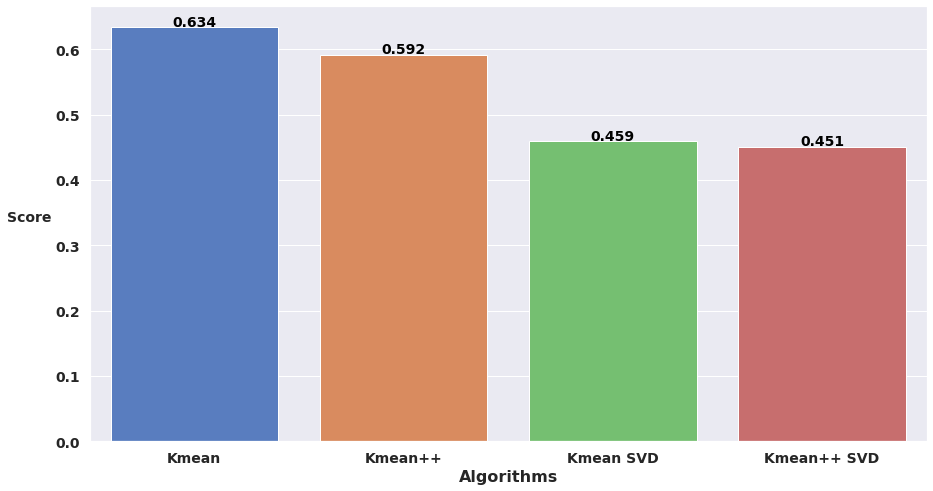

In [54]:
#plot the result of each algorithm and its scores
plt.figure(figsize=(15,8))
sns.set(palette="muted", color_codes=True)
first_15 = sns.barplot(x=algorithms, y=score)
plt.xticks( fontsize=14, fontweight='bold')
plt.xlabel('Algorithms', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Score', rotation=0, ha='right', fontsize=14, fontweight='bold')

for patch in first_15.patches:
  first_15.annotate("%.3f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()), ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

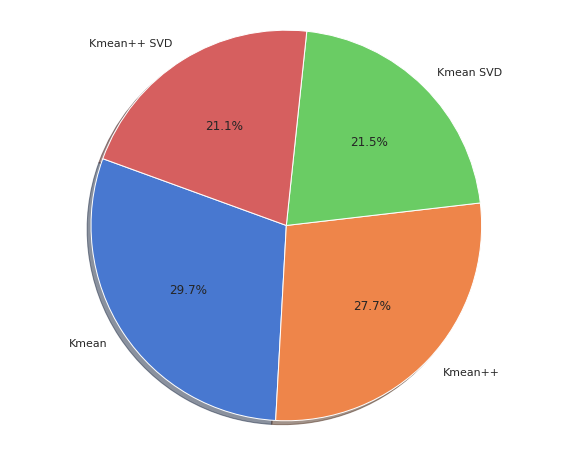

In [55]:
plt.figure(figsize=(10,8))
plt.pie(score, labels=algorithms, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.show()

> As we can see, The best model was `Kmean` without dimensionality reduction

> Which give us score = `0.634`

#Using Elbow to see best `K`

> I using this method now to see if i used good `k` or not.

> And to see if I'm going to rebuild all these models with the new `k` or not, if there is a new `k`

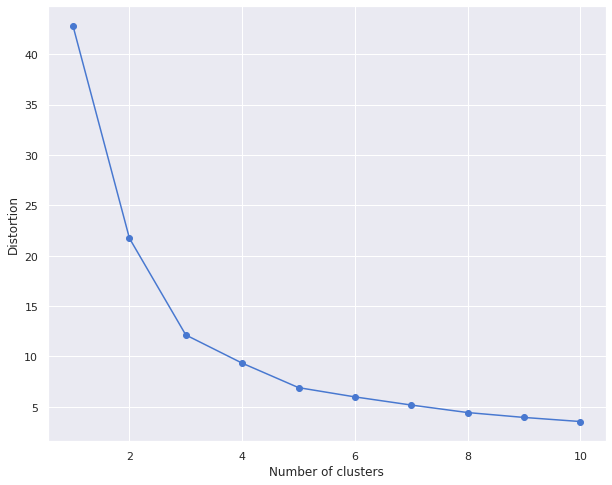

In [58]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

> As we can see, The best `K` is `[5, 6]` look like what I selected so what i selected was good

#References



> [Ref.](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

> [Ref.](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html)

> [Ref.](https://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py)

> [Ref.](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.Yn6M2ehBxPZ)

> [Ref.](https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c)

> [Ref.](https://towardsdatascience.com/topic-modeling-with-latent-semantic-analysis-58aeab6ab2f2)
